In [2]:
import os
import pandas as pd

In [75]:
os.chdir("/Users/Patrice/DataspellProjects/Physio/Data/La_planete_au_tresor/ecg/electrocardiograms")

# Lecture d'un fichier ecg.....csv

In [89]:
date = pd.read_csv("ecg_2022-02-27_1.csv",skiprows=2,header=None,names=["name","date"], nrows=1, parse_dates=['date'])

In [90]:
date = date['date']

In [93]:
print(date[0])

2022-02-27 15:53:02+01:00


In [15]:
ecg = pd.read_csv("ecg_2022-02-27_1.csv",skiprows=13,header=None,names=["dérivation","dérivationDI"])

In [16]:
ecg.head()

,dérivation,dérivationDI
0,-357,146.0
1,-488,874.0
2,-489,978.0
3,-455,9.0
4,-452,955.0


<AxesSubplot:>

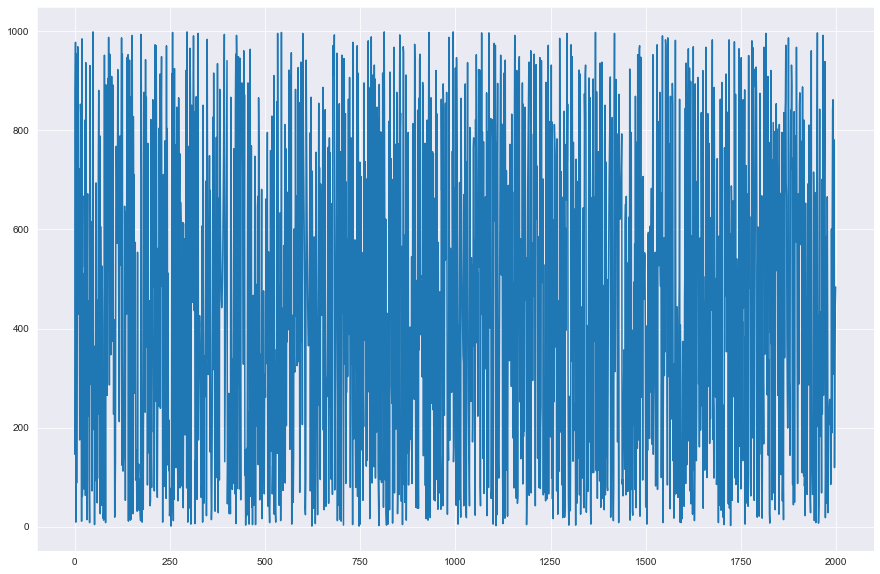

In [29]:
ecg.iloc[0:2000]['dérivationDI'].plot(figsize=(15,10))

<AxesSubplot:>

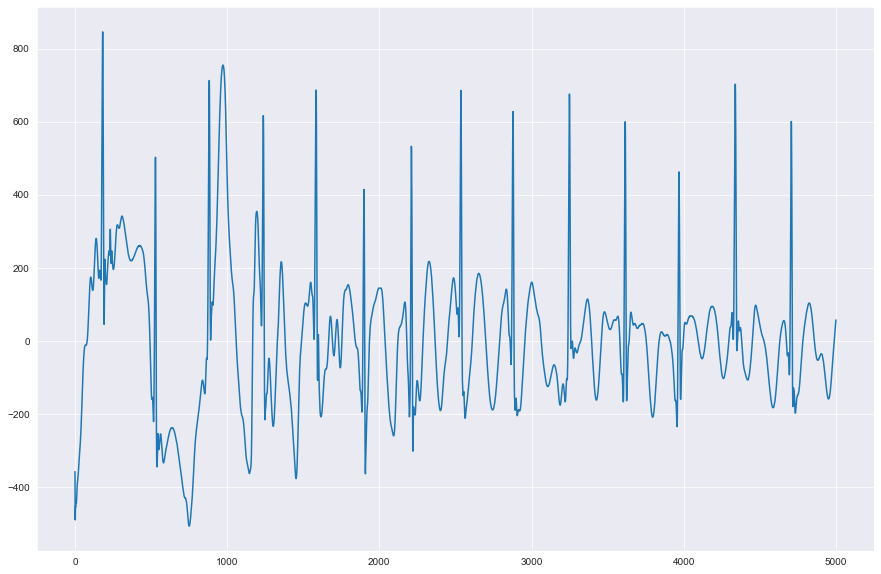

In [28]:
ecg.iloc[0:5000]['dérivation'].plot(figsize=(15,10))

<AxesSubplot:>

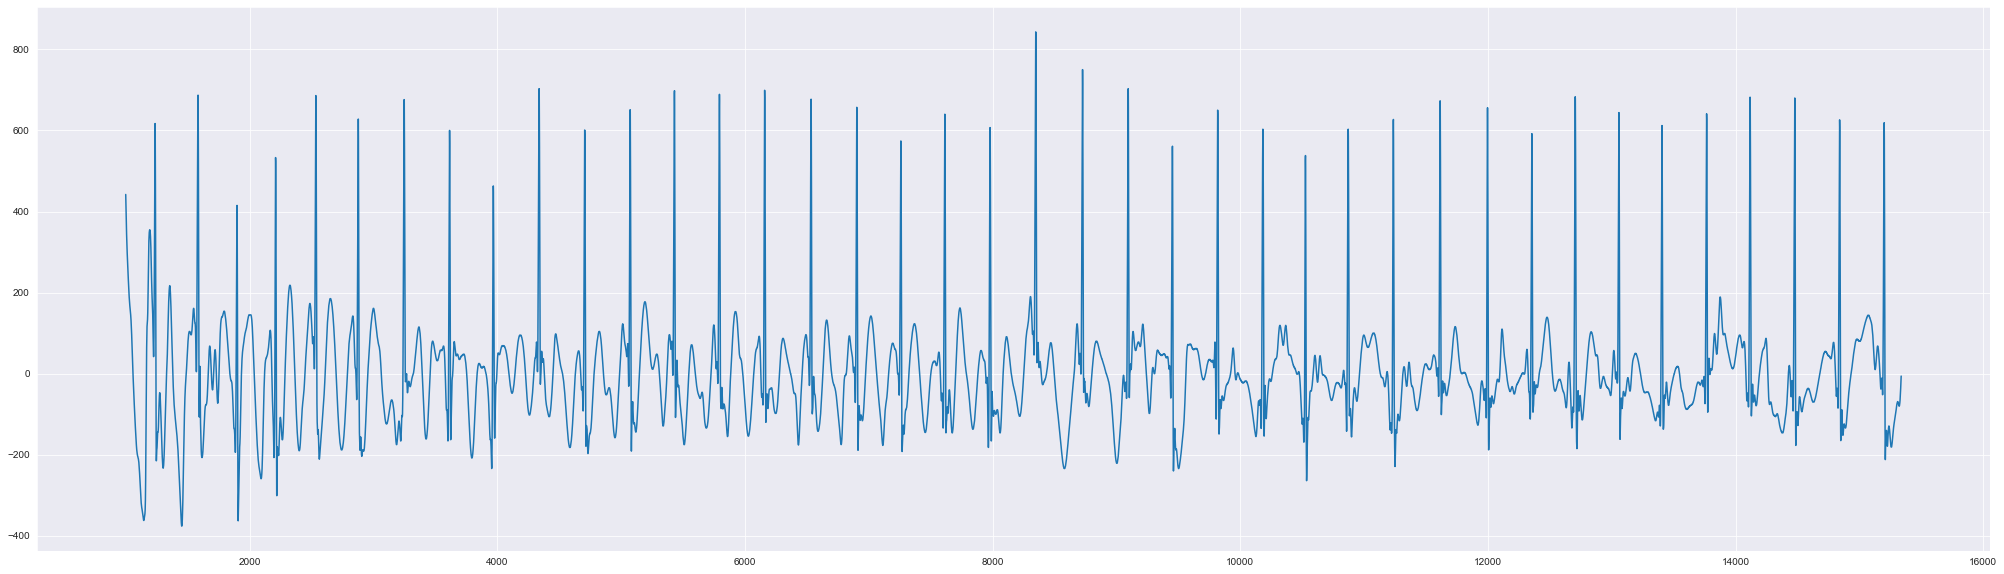

In [32]:
ecg.iloc[1000:]['dérivation'].plot(figsize=(35,10))

In [20]:
ecg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15337 entries, 0 to 15336
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dérivation    15337 non-null  int64  
 1   dérivationDI  15323 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 239.8 KB


In [18]:
ecg.describe()

,dérivation,dérivationDI
count,15337.000000,15323.000000
mean,1.878399,455.492658
std,146.764123,304.552587
min,-506.000000,1.000000
25%,-77.000000,167.500000
50%,-9.000000,446.000000
75%,61.000000,719.000000
max,846.000000,999.000000


# Extraction rythme cardiaque du fichier export.xml

In [38]:
os.chdir("..")
print(os.getcwd())

/Users/Patrice/DataspellProjects/Physio/Data/La_planete_au_tresor/ecg


In [61]:
rythme = pd.read_xml("export.xml", xpath=".//Record[@type='HKQuantityTypeIdentifierHeartRate']")

In [62]:
rythme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66868 entries, 0 to 66867
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           66868 non-null  object 
 1   sourceName     66868 non-null  object 
 2   sourceVersion  66868 non-null  object 
 3   device         66868 non-null  object 
 4   unit           66868 non-null  object 
 5   creationDate   66868 non-null  object 
 6   startDate      66868 non-null  object 
 7   endDate        66868 non-null  object 
 8   value          66868 non-null  float64
 9   MetadataEntry  0 non-null      float64
dtypes: float64(2), object(8)
memory usage: 5.1+ MB


In [63]:
rythme.head(10)

,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value,MetadataEntry
0,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x281669ae0>, name:Apple Watch, ma...",count/min,2020-03-17 09:29:35 +0100,2020-03-17 09:24:38 +0100,2020-03-17 09:24:38 +0100,92.0,NaN
1,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166bac0>, name:Apple Watch, ma...",count/min,2020-03-17 11:41:52 +0100,2020-03-17 09:27:54 +0100,2020-03-17 09:27:54 +0100,93.0,NaN
2,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x2816680a0>, name:Apple Watch, ma...",count/min,2020-03-18 11:06:59 +0100,2020-03-18 11:06:58 +0100,2020-03-18 11:06:58 +0100,82.0,NaN
3,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166bc00>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:04 +0100,2020-03-18 11:07:00 +0100,2020-03-18 11:07:00 +0100,82.0,NaN
4,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166bb60>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:13 +0100,2020-03-18 11:07:12 +0100,2020-03-18 11:07:12 +0100,91.0,NaN
5,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x281669b30>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:13 +0100,2020-03-18 11:07:13 +0100,2020-03-18 11:07:13 +0100,89.0,NaN
6,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x281668b40>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:15 +0100,2020-03-18 11:07:14 +0100,2020-03-18 11:07:14 +0100,89.0,NaN
7,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166aa80>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:16 +0100,2020-03-18 11:07:15 +0100,2020-03-18 11:07:15 +0100,88.0,NaN
8,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166a7b0>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:16 +0100,2020-03-18 11:07:16 +0100,2020-03-18 11:07:16 +0100,84.0,NaN
9,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166a0d0>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:18 +0100,2020-03-18 11:07:17 +0100,2020-03-18 11:07:17 +0100,90.0,NaN


In [64]:
rythme = rythme[['creationDate','startDate','value']]

<AxesSubplot:>

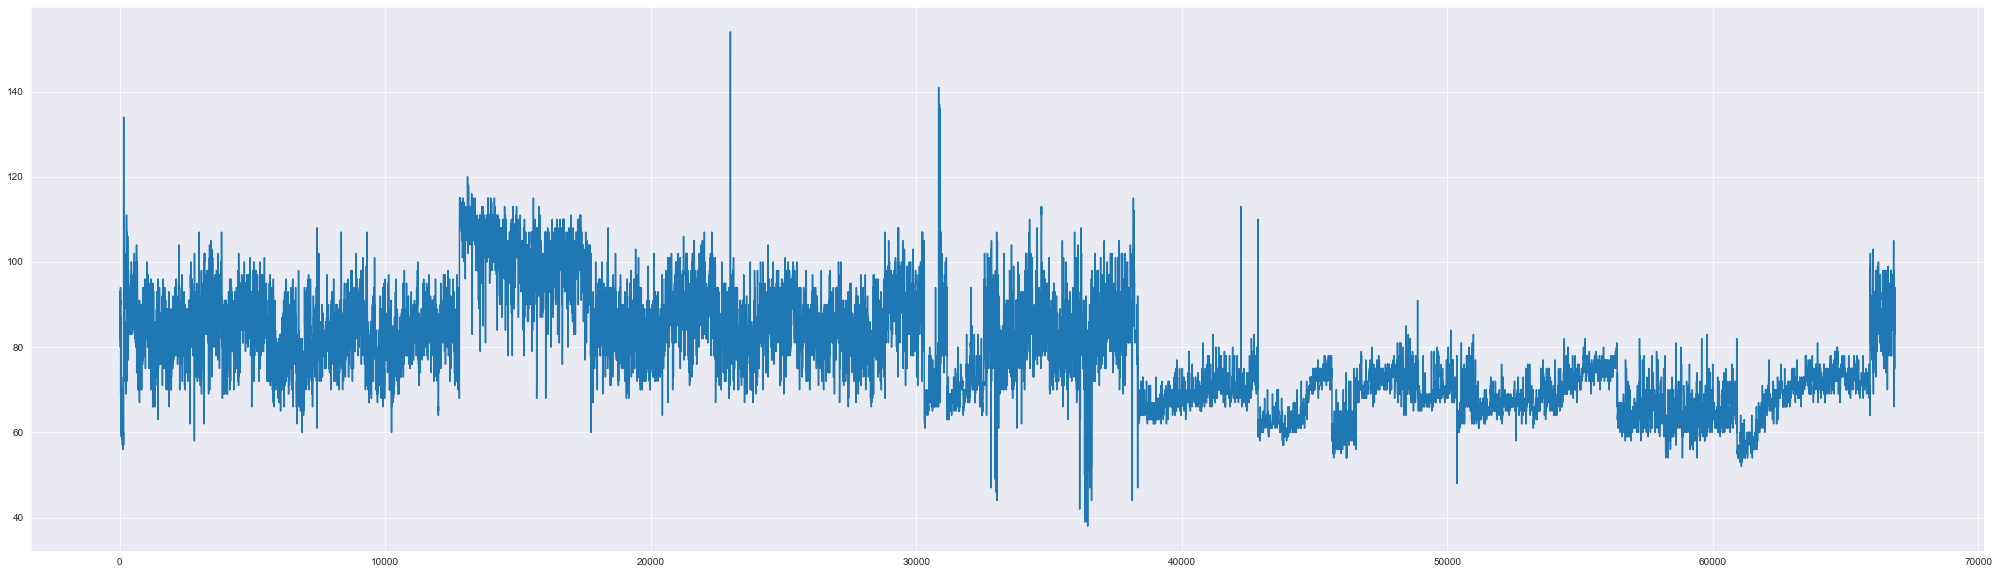

In [71]:
rythme['value'].astype(float).plot(figsize=(35,10))

In [66]:
rythme['creationDate'] = pd.to_datetime(rythme['creationDate'])
rythme['startDate'] = pd.to_datetime(rythme['startDate'])
rythme['value'] = rythme['value'].astype(int)

In [67]:
rythme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66868 entries, 0 to 66867
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype                               
---  ------        --------------  -----                               
 0   creationDate  66868 non-null  datetime64[ns, pytz.FixedOffset(60)]
 1   startDate     66868 non-null  datetime64[ns, pytz.FixedOffset(60)]
 2   value         66868 non-null  int64                               
dtypes: datetime64[ns, pytz.FixedOffset(60)](2), int64(1)
memory usage: 1.5 MB


In [68]:
rythme.describe()

,value
count,66868.000000
mean,78.717443
std,12.040502
min,38.000000
25%,69.000000
50%,77.000000
75%,87.000000
max,154.000000


In [180]:
rythme.tail()

,creationDate,value
startDate,,
2022-02-27 16:11:34+01:00,2022-02-27 16:11:35+01:00,86
2022-02-27 16:11:35+01:00,2022-02-27 16:11:36+01:00,85
2022-02-27 16:11:36+01:00,2022-02-27 16:11:36+01:00,85
2022-02-27 16:11:37+01:00,2022-02-27 16:11:38+01:00,85
2022-02-27 16:11:38+01:00,2022-02-27 16:11:39+01:00,85


In [183]:
rythme.loc[rythme.index==pd.Timestamp("2022-02-27 16:11:38+01:00")]

,creationDate,value
startDate,,
2022-02-27 16:11:38+01:00,2022-02-27 16:11:39+01:00,85


In [188]:
rythme.loc[(rythme.index.day==pd.Timestamp("2022-02-27 16:11:38+01:00").day) & (rythme.index.year==pd.Timestamp("2022-02-27 16:11:38+01:00").year) & (rythme.index.month==pd.Timestamp("2022-02-27 16:11:38+01:00").month)]

,creationDate,value
startDate,,
2022-02-27 15:52:31+01:00,2022-02-27 15:52:32+01:00,91
2022-02-27 15:52:32+01:00,2022-02-27 15:52:32+01:00,90
2022-02-27 15:52:33+01:00,2022-02-27 15:52:34+01:00,88
2022-02-27 15:52:34+01:00,2022-02-27 15:52:34+01:00,88
2022-02-27 15:52:35+01:00,2022-02-27 15:52:36+01:00,85
...,...,...
2022-02-27 16:11:34+01:00,2022-02-27 16:11:35+01:00,86
2022-02-27 16:11:35+01:00,2022-02-27 16:11:36+01:00,85
2022-02-27 16:11:36+01:00,2022-02-27 16:11:36+01:00,85


In [192]:
rythme.loc[(rythme.index.day==pd.Timestamp("2022-02-27 16:11:38+01:00").day) & (rythme.index.year==pd.Timestamp("2022-02-27 16:11:38+01:00").year) & (rythme.index.month==pd.Timestamp("2022-02-27 16:11:38+01:00").month)]['value']

91

In [204]:
(rythme.index[1] - pd.Timestamp("2022-02-27 16:11:38+01:00")).total_seconds()

-61541024.0

In [217]:
rythme.loc[(rythme.index - pd.Timestamp("2022-02-27 16:04:16+01:00")).total_seconds() == -4]

,creationDate,value
startDate,,
2022-02-27 16:04:12+01:00,2022-02-27 16:04:13+01:00,87


In [162]:
rythme.loc["2022-02-27 16:08:19+01:00"].value

KeyError: '2022-02-27 16:08:19+01:00'

# Synchronisation rythme cardiaque et ECG
Open each .csv file, look for creation date and then search for this date into export.xml

In [113]:
rootDir = "/Users/Patrice/DataspellProjects/Physio/Data/La_planete_au_tresor/ecg/"
ecgDir = "electrocardiograms"
files = sorted(os.listdir(rootDir+ecgDir))
csvFiles = [f for f in files if f.endswith('.csv')]

In [114]:
print(csvFiles)

['ecg_2022-02-27_00.csv', 'ecg_2022-02-27_01.csv', 'ecg_2022-02-27_02.csv', 'ecg_2022-02-27_03.csv', 'ecg_2022-02-27_04.csv', 'ecg_2022-02-27_05.csv', 'ecg_2022-02-27_06.csv', 'ecg_2022-02-27_07.csv', 'ecg_2022-02-27_08.csv', 'ecg_2022-02-27_09.csv', 'ecg_2022-02-27_10.csv', 'ecg_2022-02-27_11.csv', 'ecg_2022-02-27_12.csv', 'ecg_2022-02-27_13.csv', 'ecg_2022-02-27_14.csv', 'ecg_2022-02-27_15.csv', 'ecg_2022-02-27_16.csv', 'ecg_2022-02-27_17.csv', 'ecg_2022-02-27_18.csv', 'ecg_2022-02-27_19.csv', 'ecg_2022-02-27_20.csv', 'ecg_2022-02-27_21.csv', 'ecg_2022-02-27_22.csv', 'ecg_2022-02-27_23.csv', 'ecg_2022-02-27_24.csv', 'ecg_2022-02-27_25.csv', 'ecg_2022-02-27_26.csv', 'ecg_2022-02-27_27.csv', 'ecg_2022-02-27_28.csv', 'ecg_2022-02-27_29.csv', 'ecg_2022-02-27_30.csv', 'ecg_2022-02-27_31.csv', 'ecg_2022-02-27_32.csv']


In [160]:
def lookForDate(f):
    date = pd.read_csv(f,skiprows=2,header=None,names=["name","date"], nrows=1, parse_dates=['date'])
    date = date['date']
    #print(date[0])
    return date

In [174]:
rythme = pd.read_xml(rootDir+"export.xml", xpath=".//Record[@type='HKQuantityTypeIdentifierHeartRate']")
rythme = rythme[['creationDate','startDate','value']]
rythme['creationDate'] = pd.to_datetime(rythme['creationDate'])
rythme['startDate'] = pd.to_datetime(rythme['startDate'])
rythme.set_index(pd.DatetimeIndex(rythme['startDate']), inplace=True)
rythme.drop('startDate', inplace=True, axis=1)
rythme['value'] = rythme['value'].astype(int)

In [175]:
rythme.head()

,creationDate,value
startDate,,
2020-03-17 09:24:38+01:00,2020-03-17 09:29:35+01:00,92
2020-03-17 09:27:54+01:00,2020-03-17 11:41:52+01:00,93
2020-03-18 11:06:58+01:00,2020-03-18 11:06:59+01:00,82
2020-03-18 11:07:00+01:00,2020-03-18 11:07:04+01:00,82
2020-03-18 11:07:12+01:00,2020-03-18 11:07:13+01:00,91


In [178]:
for f in csvFiles:
    date = lookForDate(f)
    #print(date[0], type(date[0]))
    ecg = pd.read_csv(f,skiprows=13,header=None,names=["derivation","derivationDI"])
    if date[0] in rythme.index:
        print("valeur : "+rythme.loc[date[0]].value+" à "+str(date[0]))
    else:
        print(str(date[0])+" non trouvé")
    rythme.loc[(rythme.index.day==date[0].day) & (rythme.index.year==date[0].year) & (rythme.index.month==date[0].month) & ]['value']

2022-02-27 15:52:28+01:00 non trouvé
2022-02-27 15:53:02+01:00 non trouvé
2022-02-27 15:53:36+01:00 non trouvé
2022-02-27 15:54:11+01:00 non trouvé
2022-02-27 15:54:45+01:00 non trouvé
2022-02-27 15:55:20+01:00 non trouvé
2022-02-27 15:55:54+01:00 non trouvé
2022-02-27 15:56:29+01:00 non trouvé
2022-02-27 15:57:03+01:00 non trouvé
2022-02-27 15:57:38+01:00 non trouvé
2022-02-27 15:58:13+01:00 non trouvé
2022-02-27 15:58:47+01:00 non trouvé
2022-02-27 15:59:22+01:00 non trouvé
2022-02-27 16:00:12+01:00 non trouvé
2022-02-27 16:00:47+01:00 non trouvé
2022-02-27 16:01:21+01:00 non trouvé
2022-02-27 16:01:57+01:00 non trouvé
2022-02-27 16:02:32+01:00 non trouvé
2022-02-27 16:03:08+01:00 non trouvé
2022-02-27 16:03:42+01:00 non trouvé
2022-02-27 16:04:16+01:00 non trouvé
2022-02-27 16:04:51+01:00 non trouvé
2022-02-27 16:05:25+01:00 non trouvé
2022-02-27 16:05:59+01:00 non trouvé
2022-02-27 16:06:33+01:00 non trouvé
2022-02-27 16:07:09+01:00 non trouvé
2022-02-27 16:07:44+01:00 non trouvé
2

In [119]:
print(date+1)

TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`